In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.ticker import MultipleLocator

import sys
sys.path.append('../')
from kinetic_fit.equations import *

Loding data into dataframes:

In [2]:
ptRNA = pd.read_excel('substrate.xlsx', sheet_name='Sheet1', skiprows=3, nrows=11,  usecols='A:G')
ss21ntRNA = pd.read_excel('substrate.xlsx', sheet_name='Sheet1', skiprows=3, nrows=11,  usecols='J:N')
x1S_DS = pd.read_excel('substrate.xlsx', sheet_name='Sheet1', skiprows=3, nrows=11,  usecols='R:U')
x1s_loop = pd.read_excel('substrate.xlsx', sheet_name='Sheet1', skiprows=3, nrows=11,  usecols='AA:AD')
x1s_mod = pd.read_excel('substrate.xlsx', sheet_name='Sheet1', skiprows=3, nrows=11,  usecols='AI:AK')
p_met_mini = pd.read_excel('substrate.xlsx', sheet_name='Sheet1', skiprows=3, nrows=8,  usecols='AP:AW')

In [3]:
# Normalizing
def normalize(df_):
    df_.columns = ['Time (min)','A0','A1','A2','A3','A4','A5','A6'][:df_.shape[1]]
    return pd.concat([df_['Time (min)'],df_.iloc[:,1:].div(df_.iloc[:,1:].sum(axis=1), axis=0)], axis=1)

ptRNA = normalize(ptRNA)
ss21ntRNA = normalize(ss21ntRNA)
x1S_DS = normalize(x1S_DS)
x1s_loop = normalize(x1s_loop)
x1s_mod = normalize(x1s_mod)
p_met_mini = normalize(p_met_mini)

In [4]:
k_vals = {'ptRNA':ptRNA, 'ss21nt RNA':ss21ntRNA, '1S_DS':x1S_DS, '1S_LOOP':x1s_loop, '1S_MOD':x1s_mod, 'p-MET mini':p_met_mini}
contour_ = {'ptRNA':0, 'ss21nt RNA':0, '1S_DS':0, '1S_LOOP':0, '1S_MOD':0, 'p-MET mini':0}

for key in k_vals.keys():
    df = k_vals[key]
    fit = ParameterFitter(t = df['Time (min)'], A_ = [df.iloc[:, i].tolist() for i in range(1,len(df.columns))])
    fit.fit()
    k_vals[key] = fit.get_parameters()
    contour_[key] = fit.get_contour()

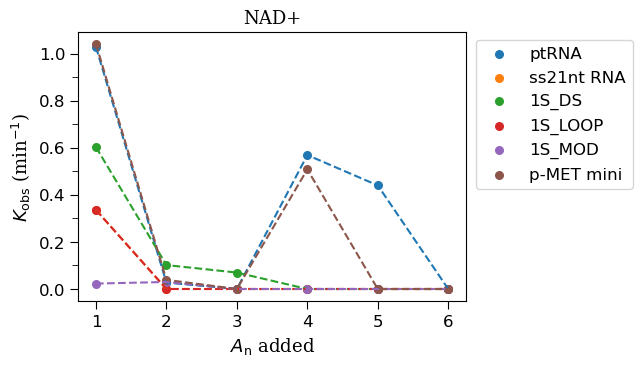

In [5]:
# Plot k values
fig, ax = plt.subplots(figsize=(5, 3.5))
for key in k_vals.keys():
    ax.scatter(np.arange(1, 7), k_vals[key][:-1], label=key, s=30)
    ax.plot(np.arange(1, 7),k_vals[key][:-1], '--')

ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12, length=6)
plt.gca().tick_params(axis='x', which='minor', bottom=False)
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='y', which='minor', length=4)
plt.title('NAD+', family='serif', fontsize=13)

legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
plt.savefig('substrate_1_1.png', dpi=250, bbox_inches='tight')

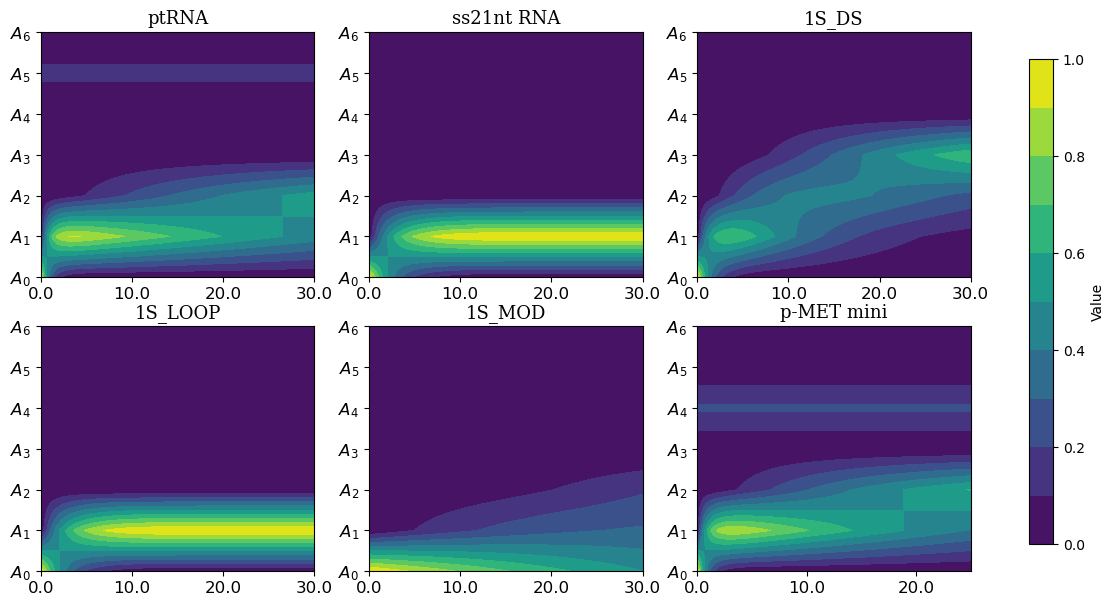

In [6]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,7), gridspec_kw={'wspace': 0.2})
axs = axs.flatten()
for ax, key in zip(axs, contour_.keys()):
    contour_[key][np.where(contour_[key]<1e-6)] = 0.0
    contours = ax.contourf(contour_[key], levels=10, cmap='viridis', vmin=1e-6, vmax=1)
    x_ = np.arange(0, contour_[key].shape[1]+1, 200)
    ax.set_xticks(x_)
    ax.set_xticklabels(x_*0.05)
    ax.set_title(key, family='serif', fontsize=13)  
    ax.set_yticks(range(7))
    ax.set_yticklabels([fr'$A_{{{n}}}$' for n in np.arange(7)])
    ax.tick_params(axis='both', labelsize=12)
    
cbar = plt.colorbar(contours, ax=axs.ravel().tolist(), shrink=0.9)
cbar.set_label('Value')
plt.savefig('substrate_2_1.png', dpi=250, bbox_inches='tight')